In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
_xrange=[-1,+1]
_yrange=[-1,+1]
n_unlabeled=10000
unl=np.zeros([2,n_unlabeled])

In [3]:
unl[0,:]=random.rand(n_unlabeled)*(_xrange[1]-_xrange[0])+_xrange[0]
unl[1,:]=random.rand(n_unlabeled)*(_yrange[1]-_yrange[0])+_yrange[0]

In [4]:
_bias=0.8
def F(instance):
    if instance[0]>0:
        return _bias
    else:
        return 1-_bias
def y_given_x(instances):
    p=np.apply_along_axis(F,0,instances)
    y=np.random.rand(len(p))<p
    return p,y
p,y=y_given_x(unl)
print '>1/2',y[p>.5][:5]
print '<1/2',y[p<.5][:5]

>1/2 [ True  True  True False False]
<1/2 [False False False False  True]


In [5]:
c=['b' if l else 'r' for l in y]
c[:5]

['r', 'b', 'b', 'r', 'b']

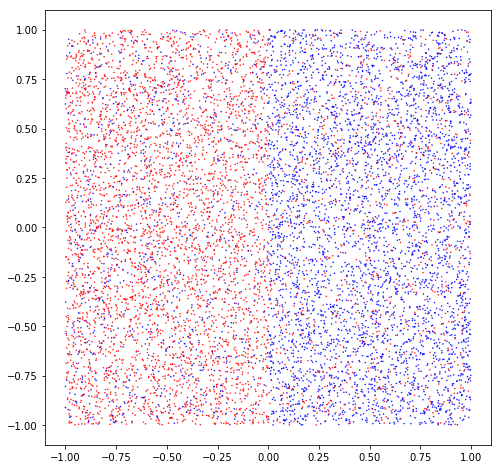

In [6]:
figure(figsize=[8,8])
scatter(unl[0,:],unl[1,:],marker='.',s=1,c=c);

In [7]:
#initialize labeled to be a 10% sample
n=unl.shape[1]
labeled=np.random.rand(n)<0.1

In [8]:
_x=0.5; _y=0.0; _r=0.2
#def conf_bar(x,y,r,unl,
def _in_ball(_x,_y,_r,unl):
    return (unl[0,:]-_x)**2+(unl[1,:]-_y)**2 < _r**2
in_ball=_in_ball(_x,_y,_r,unl)

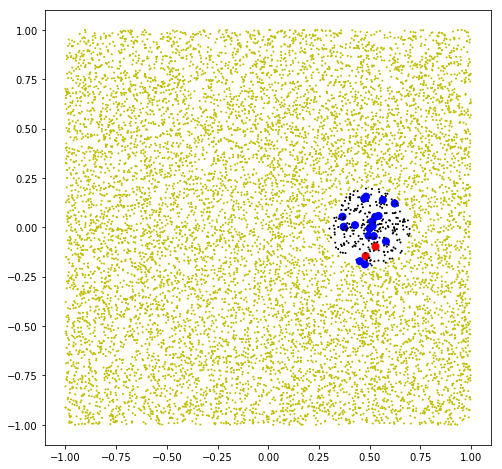

In [9]:
c=['y']*n
s=[1]*n
for i in range(n):
    if in_ball[i]:
        if  labeled[i]:
            s[i]=50
            if y[i]:
                c[i]='b'
            else:
                c[i]='r'
        else:
            c[i]='k'

figure(figsize=[8,8])
scatter(unl[0,:],unl[1,:],s=s,c=c);

In [10]:
B=[]
for i in range(1000):
    _x,=random.rand(1)*(_xrange[1]-_xrange[0])+_xrange[0]
    _y,=random.rand(1)*(_yrange[1]-_yrange[0])+_yrange[0]
    _r,=random.rand(1)/2
    in_ball = (unl[0,:]-_x)**2+(unl[1,:]-_y)**2 < _r**2

    k=sum(labeled*in_ball)
    pos=sum(labeled*in_ball*y)

    if k>5:
        bias=(2.*pos-k)/k 
        normal_bias = abs(bias)-4/sqrt(k+0.0)
        #print "x=%6.2f, y=%6.2f, r=%6.2f, k=%4d, bias=%6.3f, normal_bias=%5.3f"\
        #%(_x,_y,_r,k,bias,normal_bias)
        if normal_bias>0:
            B.append({'x':_x,'y':_y,'r':_r,'bias':bias,'normal_bias':normal_bias})


In [11]:
c=np.array(['y']*n)
for b in B:
    _x=b['x']
    _y=b['y']
    _r=b['r']
    pol='b' if b['bias']>0 else 'r'
    
    points=_in_ball(_x,_y,_r,unl)
    c[points]=pol

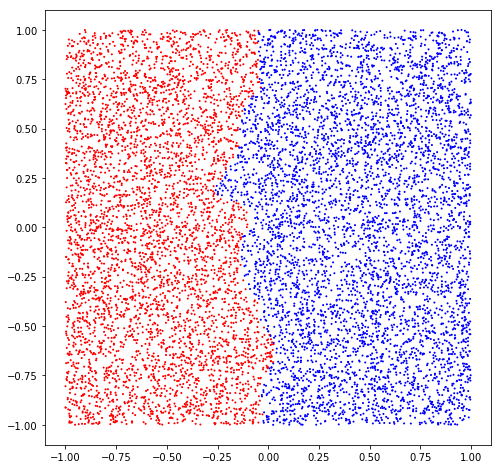

In [12]:
figure(figsize=[8,8])
scatter(unl[0,:],unl[1,:],s=1,c=c);

In [13]:
B=sorted(B,key=lambda x:x['r'],reverse=True)

In [14]:
# Eliminate points for which all of the covering points predict consistently
single_sided = np.zeros_like(p)
M=np.empty([len(B),len(p)],dtype=np.int8)  
for i in range(len(B)):
    b=B[i]
    _x=b['x']
    _y=b['y']
    _r=b['r']
    pol=sign(b['bias'])
    M[i:]=(1*_in_ball(_x,_y,_r,unl))*pol
    
    

In [15]:
_sign=np.zeros([2,len(p)])

_sign[0,:]=np.count_nonzero(M==1,axis=0)
_sign[1,:]=np.count_nonzero(M==-1,axis=0)

print _sign[:,:10]

[[  0.  40.  66.   6.  25.  32.  30.  25.  40.  53.]
 [ 55.   0.   0.  27.   0.   0.   1.   0.   0.   0.]]


In [16]:
c=np.array(['y']*n)
switch=np.zeros(n)

for i in range(n):
    pos,neg=_sign[:,i]
    if pos==0 and neg==0:
        c[i]='k'
    if pos==0 and neg>0:
        c[i]='r'
        switch[i]=-1
    if pos>0 and neg==0:
        c[i]='b'
        switch[i]=1
    if pos>0 and neg>0:
        c[i]='g'
        

In [17]:
n

10000

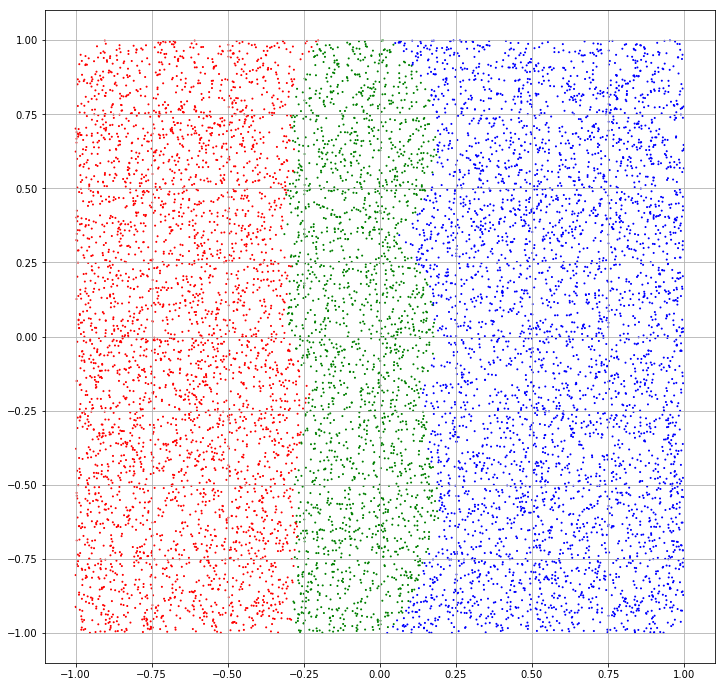

In [18]:
figure(figsize=[12,12])
scatter(unl[0,:],unl[1,:],s=1,c=c);
grid()

In [578]:
def subset(r1,r2):
    """ the boolean vector r1 defines a subset (including equal) of r2"""
    return sum(~r2*r1)==0

In [579]:
r0=M[0,:]!=0
r1=M[301,:]!=0

In [580]:
r0=np.array([True,True,True,False])
r1=np.array([True,False,False,False])
subset(r1,r0)

True

In [581]:
M.shape

(379, 10000)

In [582]:
for i in range(n):
    if switch[i]!=0:
        continue
    print i,switch[i],_sign[:,i],
    Set=M[:,i]
    NZ,=nonzero(Set)
    print len(NZ)
    for ii in range(len(NZ)-1):
        for jj in range(i,len(NZ)):
            if Subsets[NZ[ii],NZ[jj]]==1:
                print NZ[ii],Set[NZ[ii]],'subset of',NZ[jj],Set[NZ[jj]]
        
    #print [(NZ[i],Set[NZ[i]]) for i in range(len(NZ))]
    if i>10:
        break

1 0.0 [ 25.   6.] 31
293 1 subset of 163 1
11 0.0 [ 8.  8.] 16


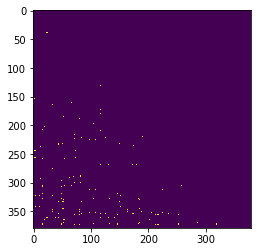

In [584]:
nb=M.shape[0]
Subsets=np.zeros([nb,nb])
for i in range(nb-1):
    for j in range(i+1,nb):
        if subset(M[j,:],M[i,:]):
            Subsets[j,i]=1
            
imshow(Subsets)